In [ ]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
%matplotlib inline


**REMINDER: it's (row, col) = (x,y)**

# Question 1-5

In [ ]:
## Define the gridworld MDP class

class Gridworld(object):
    """
    Gridworld MDP.
    """
    
    def __init__(self, grid_size, wind, discount):
        """
        grid_size: Grid size. int.
        wind: Chance of moving randomly. float.
        discount: MDP discount. float.
        -> Gridworld
        """

        self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1)) #down, right, up, left
        self.n_actions = len(self.actions)
        self.n_states = grid_size**2
        self.grid_size = grid_size
        self.wind = wind
        self.discount = discount

        # Preconstruct the transition probability array.
        self.transition_probability = np.array(
            [[[self._transition_probability(i, j, k)
               for k in range(self.n_states)]
              for j in range(self.n_actions)]
             for i in range(self.n_states)])

    def __str__(self):
        return "Gridworld({}, {}, {})".format(self.grid_size, self.wind,
                                              self.discount)
    
    def int_to_point(self, i):
        """
        Convert a state int into the corresponding coordinate.

        i: State int.
        -> (x, y) int tuple.
        """

        return (i % self.grid_size, i // self.grid_size)
        
    def point_to_int(self, p):
        """
        Convert a coordinate into the corresponding state int.

        p: (x, y) tuple.
        -> State int.
        """

        return int(p[0] + p[1]*self.grid_size)

    def neighbouring(self, i, k):
        """
        Get whether two points neighbour each other. Also returns true if they
        are the same point.

        i: (x, y) int tuple.
        k: (x, y) int tuple.
        -> bool.
        """

        return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1

    def _transition_probability(self, i, j, k):
        """
        Get the probability of transitioning from state i to state k given
        action j.

        i: State int.
        j: Action int.
        k: State int.
        -> p(s_k | s_i, a_j)
        """

        xi, yi = self.int_to_point(i)
        xj, yj = self.actions[j]
        xk, yk = self.int_to_point(k)
        

        if not self.neighbouring((xi, yi), (xk, yk)):
            return 0

        # Is k the intended state to move to?
        if (xi + xj, yi + yj) == (xk, yk):
            return (1-self.wind+(self.wind/4))
           

        # If these are not the same point, then we can move there by wind.
        if (xi, yi) != (xk, yk):
            return self.wind/4
             

        
        # If these are the same point, we can only move here by either moving
        # off the grid or being blown off the grid. Are we on a corner or not?
        if (i==0 or i==9 or i==90 or i==99):
            # Corner.
            # Can move off the edge in two directions.
            # Did we intend to move off the grid?
            if (((xi,yi)==(0,0) and (xj==-1 or yj==-1)) or ((xi,yi)==(9,0) and (xj==1 or yj==-1)) or ((xi, yi)==(0,9) and (xj==-1 or yj==1)) or ((xi, yi)==(9,9) and (xj==1 or yj==1))): 
                # we have the regular success chance of staying here
                # plus an extra chance of blowing onto the *other* off-grid square
                
                return 1-self.wind+(self.wind/2)
            else:
                # We can blow off the grid in either direction only by wind.
                return self.wind/2
              
        else:

            # Not a corner. Is it an edge?
            if (xi==0 or xi==9 or yi==0 or yi==9): #edge 
              if(xi+xj>=0 and yi+yj>=0): # stay on grid
                  return self.wind/4
              elif (xi,yi)==(xk,yk): #move off the grid
                  return 1-self.wind+(self.wind/4)
            else:
              return 0

    def reward(self, state_int): #TODO: change to reward 2 for reward 2 (only here needed to change)
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """
    
        #postive_reward = 10
        #negative_reward = -100
        
        #look at figure 6,7 to retrurn a reward at the given state. 

        reward1 = np.zeros((10,10), dtype=int)
        reward1[2, 5]=-10
        reward1[2, 6]=-10
        reward1[3, 5]=-10
        reward1[3, 6]=-10

        reward1[4, 1]=-10
        reward1[4, 2]=-10
        reward1[5, 1]=-10
        reward1[5, 2]=-10

        reward1[8, 2]=-10
        reward1[8, 3]=-10
        reward1[9, 2]=-10
        reward1[9, 3]=-10

        reward1[9,9]=1
        
        xi, yi = self.int_to_point(state_int)
        return reward1[xi,yi]

In [ ]:
## Function for plotting the matrix values

def plot_matrix(matrix):
    fig, ax = plt.subplots()
    num_rows = len(matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = matrix[i][j]
            ax.text(j + 0.5, i + 0.5, '{:.1f}'.format(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()
    plt.show()
    plt.close()

In [ ]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.1
discount = 0.8

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

In [ ]:
print(gw._transition_probability(1, 2, 1)) #i,j,k 
# j:
  # 0 = down, 1 = right, 2 = up, 3=left

0.025


In [ ]:
print("inner")
print(gw._transition_probability(44, 2, 43)) #i,j,k 
print(gw._transition_probability(44, 2, 34))
print(gw._transition_probability(44, 2, 54))
print(gw._transition_probability(44, 2, 45))

print("corner 1")
print(gw._transition_probability(0, 2, 10))
print(gw._transition_probability(0, 2, 1))
print(gw._transition_probability(0, 2, 0))


print("corner 2")
print(gw._transition_probability(0, 1, 10))
print(gw._transition_probability(0, 1, 1))
print(gw._transition_probability(0, 1, 0))

print("edge 1")
print(gw._transition_probability(1, 3, 0))
print(gw._transition_probability(1, 3, 11))
print(gw._transition_probability(1, 3, 2))
print(gw._transition_probability(1, 3, 1))

print("edge 2")
print(gw._transition_probability(1, 2, 0))
print(gw._transition_probability(1, 2, 11))
print(gw._transition_probability(1, 2, 2))
print(gw._transition_probability(1, 2, 1))


inner
0.925
0.025
0.025
0.025
corner 1
0.025
0.025
0.9500000000000001
corner 2
0.925
0.025
0.05
edge 1
0.025
0.025
0.025
0.925
edge 2
0.925
0.025
0.025
0.025


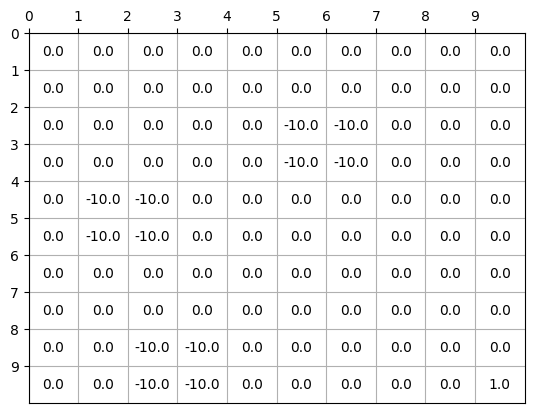

In [ ]:
## Plotting the reward value for each state of the grid

def reward_grid_plot():
    reward_matrix = np.zeros((grid_size, grid_size))
    for j in range(grid_size):
        for i in range(grid_size):
            reward_matrix[i][j] = gw.reward(gw.point_to_int((i,j)))
    plot_matrix(reward_matrix)
    return reward_matrix
reward_matrix = reward_grid_plot()

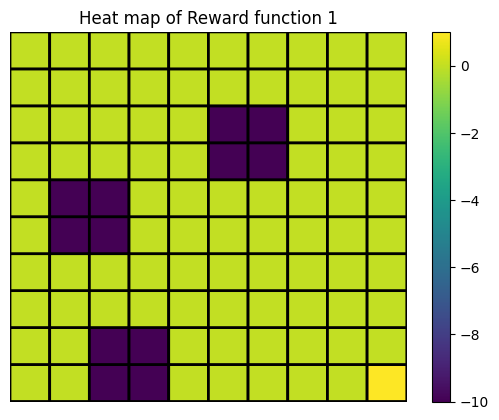

In [ ]:
## For visualization generating the heat map of the ground truth reward

plt.pcolor(np.flipud(reward_matrix), edgecolors='k', linewidths=2,)
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 1')
plt.show()

In [139]:
def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



In [153]:
## STEP BY STEP

def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  for i in range(21):
  #while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



N_steps: 21


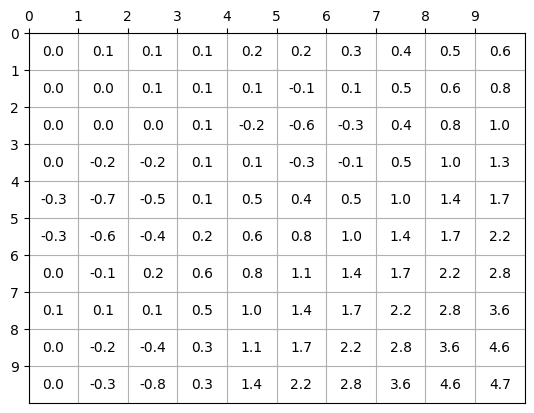

In [154]:
#### Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
    
# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = v[i]

plot_matrix(value_matrix)

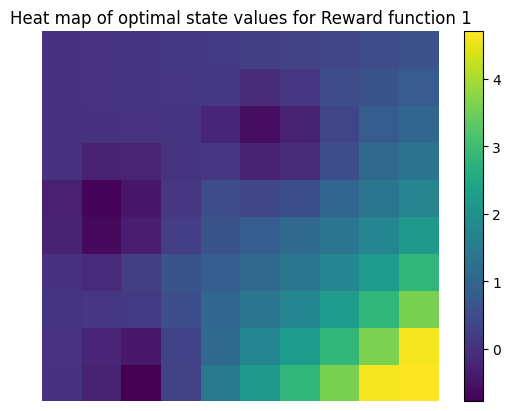

In [155]:
### For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

In [156]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """

    if v is None:
        v = optimal_value(n_states, n_actions, transition_probabilities, reward,
                          discount, threshold)

    def _policy(s):
      return v[s]
     
    policy = np.array([_policy(s) for s in range(n_states)])
    return policy

In [189]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
  
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    delta = np.inf

    while delta>threshold:
      
      delta = 0

      for s in range(n_states):
        v = V[s]

        value_arr = np.zeros(n_actions)
        for a in range(n_actions):
          value = 0
          for s_next in range(n_states):
            value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
            
          value_arr[a] = value

        V[s] = np.max(value_arr) # maximum value of all the actions
        policy[s]=np.argmax(value_arr)
        delta = max(delta, abs(v-V[s]))

    return policy


In [190]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[i][j]
            arrow = ''
            if(c == 0):
                arrow = u'↓'
            elif(c == 1):
                arrow = u'→'
            elif(c == 2):
                arrow = u'↑'
            else:
                arrow = u'←'
            
            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()

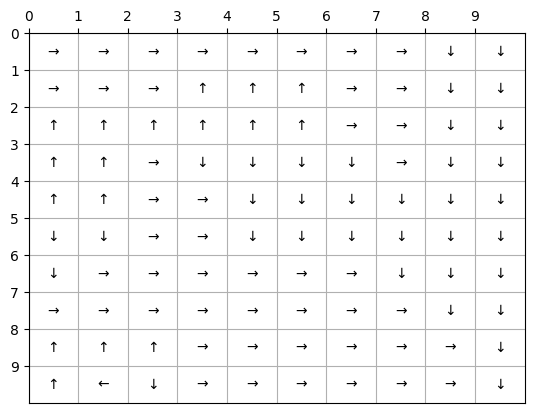

In [191]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)


# Question 6-9

In [192]:
## Define the gridworld MDP class

class Gridworld(object):
    """
    Gridworld MDP.
    """
    
    def __init__(self, grid_size, wind, discount):
        """
        grid_size: Grid size. int.
        wind: Chance of moving randomly. float.
        discount: MDP discount. float.
        -> Gridworld
        """

        self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1)) #down, right, up, left
        self.n_actions = len(self.actions)
        self.n_states = grid_size**2
        self.grid_size = grid_size
        self.wind = wind
        self.discount = discount

        # Preconstruct the transition probability array.
        self.transition_probability = np.array(
            [[[self._transition_probability(i, j, k)
               for k in range(self.n_states)]
              for j in range(self.n_actions)]
             for i in range(self.n_states)])

    def __str__(self):
        return "Gridworld({}, {}, {})".format(self.grid_size, self.wind,
                                              self.discount)
    
    def int_to_point(self, i):
        """
        Convert a state int into the corresponding coordinate.

        i: State int.
        -> (x, y) int tuple.
        """

        return (i % self.grid_size, i // self.grid_size)
        
    def point_to_int(self, p):
        """
        Convert a coordinate into the corresponding state int.

        p: (x, y) tuple.
        -> State int.
        """

        return int(p[0] + p[1]*self.grid_size)

    def neighbouring(self, i, k):
        """
        Get whether two points neighbour each other. Also returns true if they
        are the same point.

        i: (x, y) int tuple.
        k: (x, y) int tuple.
        -> bool.
        """

        return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1

    def _transition_probability(self, i, j, k):
        """
        Get the probability of transitioning from state i to state k given
        action j.

        i: State int.
        j: Action int.
        k: State int.
        -> p(s_k | s_i, a_j)
        """

        xi, yi = self.int_to_point(i)
        xj, yj = self.actions[j]
        xk, yk = self.int_to_point(k)
        

        if not self.neighbouring((xi, yi), (xk, yk)):
            return 0

        # Is k the intended state to move to?
        if (xi + xj, yi + yj) == (xk, yk):
            return (1-self.wind+(self.wind/4))
           

        # If these are not the same point, then we can move there by wind.
        if (xi, yi) != (xk, yk):
            return self.wind/4
             

        
        # If these are the same point, we can only move here by either moving
        # off the grid or being blown off the grid. Are we on a corner or not?
        if (i==0 or i==9 or i==90 or i==99):
            # Corner.
            # Can move off the edge in two directions.
            # Did we intend to move off the grid?
            if (((xi,yi)==(0,0) and (xj==-1 or yj==-1)) or ((xi,yi)==(9,0) and (xj==1 or yj==-1)) or ((xi, yi)==(0,9) and (xj==-1 or yj==1)) or ((xi, yi)==(9,9) and (xj==1 or yj==1))): 
                # we have the regular success chance of staying here
                # plus an extra chance of blowing onto the *other* off-grid square
                
                return 1-self.wind+(self.wind/2)
            else:
                # We can blow off the grid in either direction only by wind.
                return self.wind/2
              
        else:

            # Not a corner. Is it an edge?
            if (xi==0 or xi==9 or yi==0 or yi==9): #edge 
              if(xi+xj>=0 and yi+yj>=0): # stay on grid
                  return self.wind/4
              elif (xi,yi)==(xk,yk): #move off the grid
                  return 1-self.wind+(self.wind/4)
            else:
              return 0

    def reward(self, state_int): #TODO: change to reward 2 for reward 2 (only here needed to change)
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """
    
        #postive_reward = 10
        #negative_reward = -100
        
        #look at figure 6,7 to retrurn a reward at the given state. 

        reward2 = np.zeros((10,10), dtype=int)

        reward2[1,4]=-100
        reward2[1,5]=-100
        reward2[1,6]=-100

        reward2[2,4]=-100
        reward2[2,6]=-100

        reward2[3,4]=-100
        reward2[3,6]=-100
        reward2[3,7]=-100
        reward2[3,8]=-100

        reward2[4,4]=-100
        reward2[4,8]=-100

        reward2[5,4]=-100
        reward2[5,8]=-100

        reward2[6,4]=-100
        reward2[6,8]=-100

        reward2[7,6]=-100
        reward2[7,7]=-100
        reward2[7,8]=-100

        reward2[8,6]=-100

        reward2[9,9]=10
        
        xi, yi = self.int_to_point(state_int)
        return reward2[xi,yi]

In [193]:
## Function for plotting the matrix values

def plot_matrix(matrix):
    fig, ax = plt.subplots()
    num_rows = len(matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = matrix[i][j]
            ax.text(j + 0.5, i + 0.5, '{:.1f}'.format(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()
    plt.show()
    plt.close()

In [194]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.1
discount = 0.8

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

In [195]:
print(gw._transition_probability(1, 2, 1)) #i,j,k 
# j:
  # 0 = down, 1 = right, 2 = up, 3=left

0.025


In [196]:
print("inner")
print(gw._transition_probability(44, 2, 43)) #i,j,k 
print(gw._transition_probability(44, 2, 34))
print(gw._transition_probability(44, 2, 54))
print(gw._transition_probability(44, 2, 45))

print("corner 1")
print(gw._transition_probability(0, 2, 10))
print(gw._transition_probability(0, 2, 1))
print(gw._transition_probability(0, 2, 0))


print("corner 2")
print(gw._transition_probability(0, 1, 10))
print(gw._transition_probability(0, 1, 1))
print(gw._transition_probability(0, 1, 0))

print("edge 1")
print(gw._transition_probability(1, 3, 0))
print(gw._transition_probability(1, 3, 11))
print(gw._transition_probability(1, 3, 2))
print(gw._transition_probability(1, 3, 1))

print("edge 2")
print(gw._transition_probability(1, 2, 0))
print(gw._transition_probability(1, 2, 11))
print(gw._transition_probability(1, 2, 2))
print(gw._transition_probability(1, 2, 1))


inner
0.925
0.025
0.025
0.025
corner 1
0.025
0.025
0.9500000000000001
corner 2
0.925
0.025
0.05
edge 1
0.025
0.025
0.025
0.925
edge 2
0.925
0.025
0.025
0.025


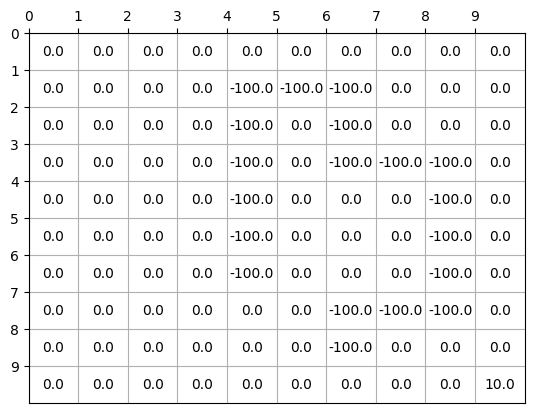

In [197]:
## Plotting the reward value for each state of the grid

def reward_grid_plot():
    reward_matrix = np.zeros((grid_size, grid_size))
    for j in range(grid_size):
        for i in range(grid_size):
            reward_matrix[i][j] = gw.reward(gw.point_to_int((i,j)))
    plot_matrix(reward_matrix)
    return reward_matrix
reward_matrix = reward_grid_plot()

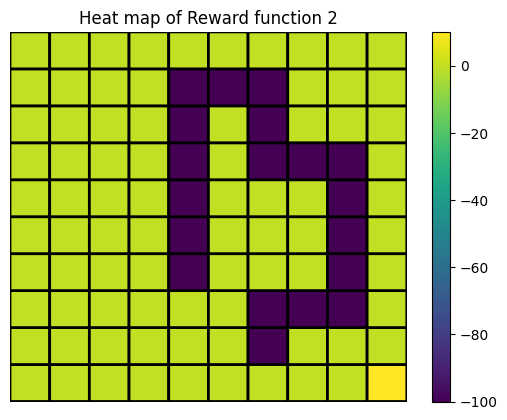

In [207]:
## For visualization generating the heat map of the ground truth reward

plt.pcolor(np.flipud(reward_matrix), edgecolors='k', linewidths=2,)
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 2')
plt.show()

In [199]:
def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



In [209]:
## STEP BY STEP

def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  #for i in range(21):
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



N_steps: 31


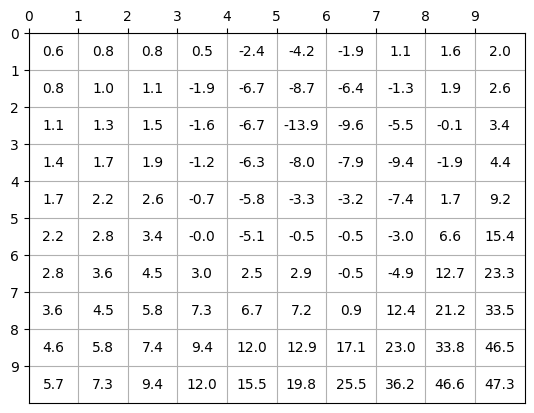

In [210]:
#### Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
    
# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = v[i]

plot_matrix(value_matrix)

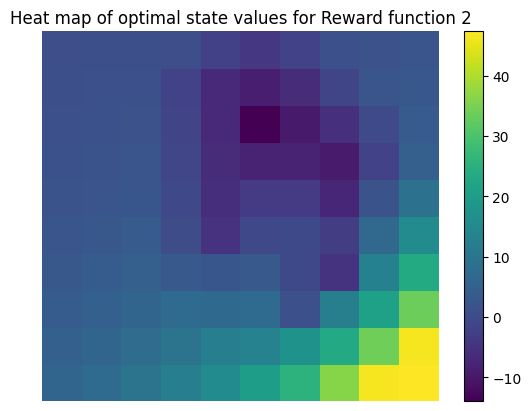

In [211]:
### For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 2')
plt.show()

In [212]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """

    if v is None:
        v = optimal_value(n_states, n_actions, transition_probabilities, reward,
                          discount, threshold)

    def _policy(s):
      return v[s]
     
    policy = np.array([_policy(s) for s in range(n_states)])
    return policy

In [213]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
  
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    delta = np.inf

    while delta>threshold:
      
      delta = 0

      for s in range(n_states):
        v = V[s]

        value_arr = np.zeros(n_actions)
        for a in range(n_actions):
          value = 0
          for s_next in range(n_states):
            value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
            
          value_arr[a] = value

        V[s] = np.max(value_arr) # maximum value of all the actions
        policy[s]=np.argmax(value_arr)
        delta = max(delta, abs(v-V[s]))

    return policy


In [214]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[i][j]
            arrow = ''
            if(c == 0):
                arrow = u'↓'
            elif(c == 1):
                arrow = u'→'
            elif(c == 2):
                arrow = u'↑'
            else:
                arrow = u'←'
            
            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()

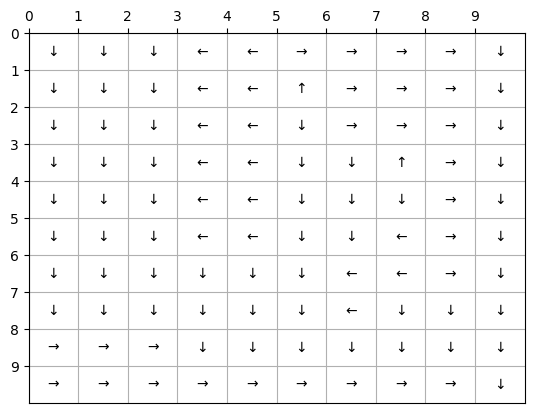

In [215]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)


# Question 9

## Reward Function 1

In [216]:
## Define the gridworld MDP class

class Gridworld(object):
    """
    Gridworld MDP.
    """
    
    def __init__(self, grid_size, wind, discount):
        """
        grid_size: Grid size. int.
        wind: Chance of moving randomly. float.
        discount: MDP discount. float.
        -> Gridworld
        """

        self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1)) #down, right, up, left
        self.n_actions = len(self.actions)
        self.n_states = grid_size**2
        self.grid_size = grid_size
        self.wind = wind
        self.discount = discount

        # Preconstruct the transition probability array.
        self.transition_probability = np.array(
            [[[self._transition_probability(i, j, k)
               for k in range(self.n_states)]
              for j in range(self.n_actions)]
             for i in range(self.n_states)])

    def __str__(self):
        return "Gridworld({}, {}, {})".format(self.grid_size, self.wind,
                                              self.discount)
    
    def int_to_point(self, i):
        """
        Convert a state int into the corresponding coordinate.

        i: State int.
        -> (x, y) int tuple.
        """

        return (i % self.grid_size, i // self.grid_size)
        
    def point_to_int(self, p):
        """
        Convert a coordinate into the corresponding state int.

        p: (x, y) tuple.
        -> State int.
        """

        return int(p[0] + p[1]*self.grid_size)

    def neighbouring(self, i, k):
        """
        Get whether two points neighbour each other. Also returns true if they
        are the same point.

        i: (x, y) int tuple.
        k: (x, y) int tuple.
        -> bool.
        """

        return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1

    def _transition_probability(self, i, j, k):
        """
        Get the probability of transitioning from state i to state k given
        action j.

        i: State int.
        j: Action int.
        k: State int.
        -> p(s_k | s_i, a_j)
        """

        xi, yi = self.int_to_point(i)
        xj, yj = self.actions[j]
        xk, yk = self.int_to_point(k)
        

        if not self.neighbouring((xi, yi), (xk, yk)):
            return 0

        # Is k the intended state to move to?
        if (xi + xj, yi + yj) == (xk, yk):
            return (1-self.wind+(self.wind/4))
           

        # If these are not the same point, then we can move there by wind.
        if (xi, yi) != (xk, yk):
            return self.wind/4
             

        
        # If these are the same point, we can only move here by either moving
        # off the grid or being blown off the grid. Are we on a corner or not?
        if (i==0 or i==9 or i==90 or i==99):
            # Corner.
            # Can move off the edge in two directions.
            # Did we intend to move off the grid?
            if (((xi,yi)==(0,0) and (xj==-1 or yj==-1)) or ((xi,yi)==(9,0) and (xj==1 or yj==-1)) or ((xi, yi)==(0,9) and (xj==-1 or yj==1)) or ((xi, yi)==(9,9) and (xj==1 or yj==1))): 
                # we have the regular success chance of staying here
                # plus an extra chance of blowing onto the *other* off-grid square
                
                return 1-self.wind+(self.wind/2)
            else:
                # We can blow off the grid in either direction only by wind.
                return self.wind/2
              
        else:

            # Not a corner. Is it an edge?
            if (xi==0 or xi==9 or yi==0 or yi==9): #edge 
              if(xi+xj>=0 and yi+yj>=0): # stay on grid
                  return self.wind/4
              elif (xi,yi)==(xk,yk): #move off the grid
                  return 1-self.wind+(self.wind/4)
            else:
              return 0

    def reward(self, state_int): #TODO: change to reward 2 for reward 2 (only here needed to change)
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """
    
        #postive_reward = 10
        #negative_reward = -100
        
        #look at figure 6,7 to retrurn a reward at the given state. 

        reward1 = np.zeros((10,10), dtype=int)
        reward1[2, 5]=-10
        reward1[2, 6]=-10
        reward1[3, 5]=-10
        reward1[3, 6]=-10

        reward1[4, 1]=-10
        reward1[4, 2]=-10
        reward1[5, 1]=-10
        reward1[5, 2]=-10

        reward1[8, 2]=-10
        reward1[8, 3]=-10
        reward1[9, 2]=-10
        reward1[9, 3]=-10

        reward1[9,9]=1
        
        xi, yi = self.int_to_point(state_int)
        return reward1[xi,yi]

In [217]:
## Function for plotting the matrix values

def plot_matrix(matrix):
    fig, ax = plt.subplots()
    num_rows = len(matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = matrix[i][j]
            ax.text(j + 0.5, i + 0.5, '{:.1f}'.format(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()
    plt.show()
    plt.close()

In [218]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.6
discount = 0.8

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

In [219]:
print(gw._transition_probability(1, 2, 1)) #i,j,k 
# j:
  # 0 = down, 1 = right, 2 = up, 3=left

0.15


In [220]:
print("inner")
print(gw._transition_probability(44, 2, 43)) #i,j,k 
print(gw._transition_probability(44, 2, 34))
print(gw._transition_probability(44, 2, 54))
print(gw._transition_probability(44, 2, 45))

print("corner 1")
print(gw._transition_probability(0, 2, 10))
print(gw._transition_probability(0, 2, 1))
print(gw._transition_probability(0, 2, 0))


print("corner 2")
print(gw._transition_probability(0, 1, 10))
print(gw._transition_probability(0, 1, 1))
print(gw._transition_probability(0, 1, 0))

print("edge 1")
print(gw._transition_probability(1, 3, 0))
print(gw._transition_probability(1, 3, 11))
print(gw._transition_probability(1, 3, 2))
print(gw._transition_probability(1, 3, 1))

print("edge 2")
print(gw._transition_probability(1, 2, 0))
print(gw._transition_probability(1, 2, 11))
print(gw._transition_probability(1, 2, 2))
print(gw._transition_probability(1, 2, 1))


inner
0.55
0.15
0.15
0.15
corner 1
0.15
0.15
0.7
corner 2
0.55
0.15
0.3
edge 1
0.15
0.15
0.15
0.55
edge 2
0.55
0.15
0.15
0.15


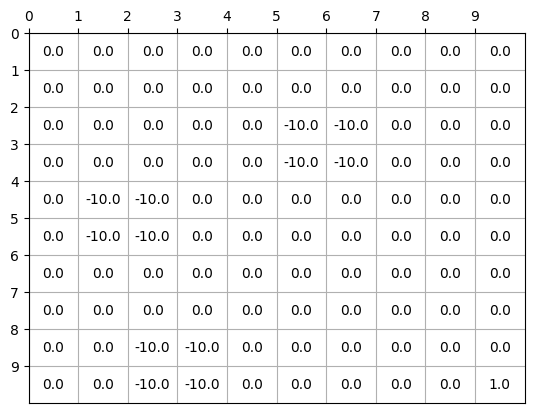

In [221]:
## Plotting the reward value for each state of the grid

def reward_grid_plot():
    reward_matrix = np.zeros((grid_size, grid_size))
    for j in range(grid_size):
        for i in range(grid_size):
            reward_matrix[i][j] = gw.reward(gw.point_to_int((i,j)))
    plot_matrix(reward_matrix)
    return reward_matrix
reward_matrix = reward_grid_plot()

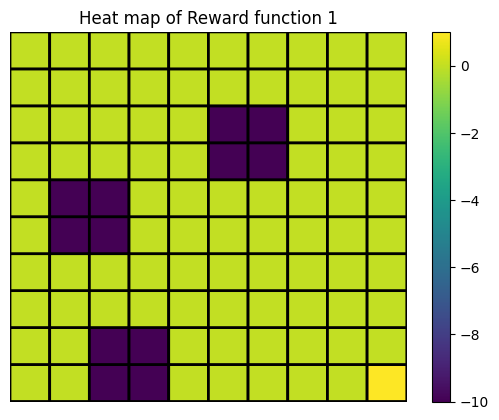

In [222]:
## For visualization generating the heat map of the ground truth reward

plt.pcolor(np.flipud(reward_matrix), edgecolors='k', linewidths=2,)
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 1')
plt.show()

In [223]:
def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



In [231]:
## STEP BY STEP

def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  #for i in range(21):
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



N_steps: 16


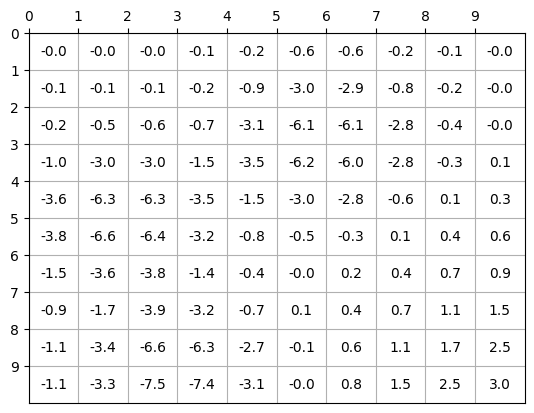

In [232]:
#### Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
    
# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = v[i]

plot_matrix(value_matrix)

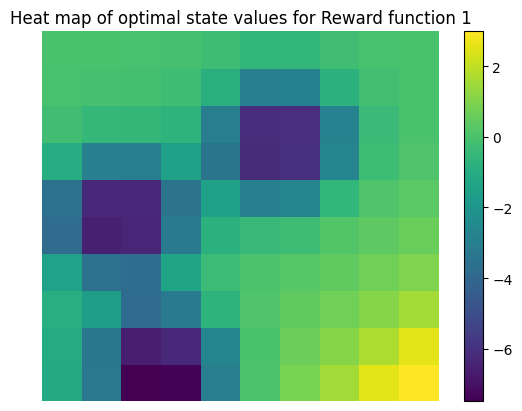

In [226]:
### For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

In [227]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """

    if v is None:
        v = optimal_value(n_states, n_actions, transition_probabilities, reward,
                          discount, threshold)

    def _policy(s):
      return v[s]
     
    policy = np.array([_policy(s) for s in range(n_states)])
    return policy

In [228]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
  
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    delta = np.inf

    while delta>threshold:
      
      delta = 0

      for s in range(n_states):
        v = V[s]

        value_arr = np.zeros(n_actions)
        for a in range(n_actions):
          value = 0
          for s_next in range(n_states):
            value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
            
          value_arr[a] = value

        V[s] = np.max(value_arr) # maximum value of all the actions
        policy[s]=np.argmax(value_arr)
        delta = max(delta, abs(v-V[s]))

    return policy


In [229]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[i][j]
            arrow = ''
            if(c == 0):
                arrow = u'↓'
            elif(c == 1):
                arrow = u'→'
            elif(c == 2):
                arrow = u'↑'
            else:
                arrow = u'←'
            
            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()

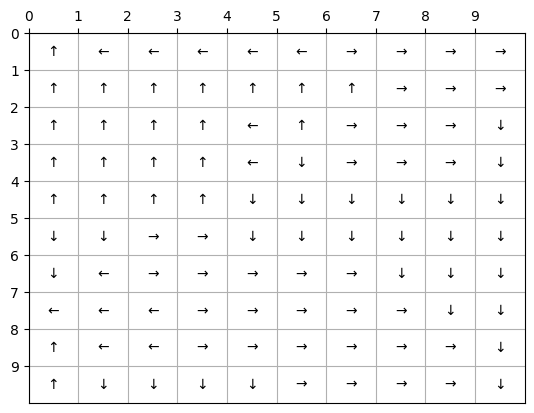

In [230]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)


## Reward Function 2

In [248]:
## Define the gridworld MDP class

class Gridworld(object):
    """
    Gridworld MDP.
    """
    
    def __init__(self, grid_size, wind, discount):
        """
        grid_size: Grid size. int.
        wind: Chance of moving randomly. float.
        discount: MDP discount. float.
        -> Gridworld
        """

        self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1)) #down, right, up, left
        self.n_actions = len(self.actions)
        self.n_states = grid_size**2
        self.grid_size = grid_size
        self.wind = wind
        self.discount = discount

        # Preconstruct the transition probability array.
        self.transition_probability = np.array(
            [[[self._transition_probability(i, j, k)
               for k in range(self.n_states)]
              for j in range(self.n_actions)]
             for i in range(self.n_states)])

    def __str__(self):
        return "Gridworld({}, {}, {})".format(self.grid_size, self.wind,
                                              self.discount)
    
    def int_to_point(self, i):
        """
        Convert a state int into the corresponding coordinate.

        i: State int.
        -> (x, y) int tuple.
        """

        return (i % self.grid_size, i // self.grid_size)
        
    def point_to_int(self, p):
        """
        Convert a coordinate into the corresponding state int.

        p: (x, y) tuple.
        -> State int.
        """

        return int(p[0] + p[1]*self.grid_size)

    def neighbouring(self, i, k):
        """
        Get whether two points neighbour each other. Also returns true if they
        are the same point.

        i: (x, y) int tuple.
        k: (x, y) int tuple.
        -> bool.
        """

        return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1

    def _transition_probability(self, i, j, k):
        """
        Get the probability of transitioning from state i to state k given
        action j.

        i: State int.
        j: Action int.
        k: State int.
        -> p(s_k | s_i, a_j)
        """

        xi, yi = self.int_to_point(i)
        xj, yj = self.actions[j]
        xk, yk = self.int_to_point(k)
        

        if not self.neighbouring((xi, yi), (xk, yk)):
            return 0

        # Is k the intended state to move to?
        if (xi + xj, yi + yj) == (xk, yk):
            return (1-self.wind+(self.wind/4))
           

        # If these are not the same point, then we can move there by wind.
        if (xi, yi) != (xk, yk):
            return self.wind/4
             

        
        # If these are the same point, we can only move here by either moving
        # off the grid or being blown off the grid. Are we on a corner or not?
        if (i==0 or i==9 or i==90 or i==99):
            # Corner.
            # Can move off the edge in two directions.
            # Did we intend to move off the grid?
            if (((xi,yi)==(0,0) and (xj==-1 or yj==-1)) or ((xi,yi)==(9,0) and (xj==1 or yj==-1)) or ((xi, yi)==(0,9) and (xj==-1 or yj==1)) or ((xi, yi)==(9,9) and (xj==1 or yj==1))): 
                # we have the regular success chance of staying here
                # plus an extra chance of blowing onto the *other* off-grid square
                
                return 1-self.wind+(self.wind/2)
            else:
                # We can blow off the grid in either direction only by wind.
                return self.wind/2
              
        else:

            # Not a corner. Is it an edge?
            if (xi==0 or xi==9 or yi==0 or yi==9): #edge 
              if(xi+xj>=0 and yi+yj>=0): # stay on grid
                  return self.wind/4
              elif (xi,yi)==(xk,yk): #move off the grid
                  return 1-self.wind+(self.wind/4)
            else:
              return 0

    def reward(self, state_int): #TODO: change to reward 2 for reward 2 (only here needed to change)
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """
    
        #postive_reward = 10
        #negative_reward = -100
        
        #look at figure 6,7 to retrurn a reward at the given state. 

        reward2 = np.zeros((10,10), dtype=int)

        reward2[1,4]=-100
        reward2[1,5]=-100
        reward2[1,6]=-100

        reward2[2,4]=-100
        reward2[2,6]=-100

        reward2[3,4]=-100
        reward2[3,6]=-100
        reward2[3,7]=-100
        reward2[3,8]=-100

        reward2[4,4]=-100
        reward2[4,8]=-100

        reward2[5,4]=-100
        reward2[5,8]=-100

        reward2[6,4]=-100
        reward2[6,8]=-100

        reward2[7,6]=-100
        reward2[7,7]=-100
        reward2[7,8]=-100

        reward2[8,6]=-100

        reward2[9,9]=10
        
        xi, yi = self.int_to_point(state_int)
        return reward2[xi,yi]

In [249]:
## Function for plotting the matrix values

def plot_matrix(matrix):
    fig, ax = plt.subplots()
    num_rows = len(matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = matrix[i][j]
            ax.text(j + 0.5, i + 0.5, '{:.1f}'.format(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()
    plt.show()
    plt.close()

In [250]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.6
discount = 0.8

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

In [251]:
print(gw._transition_probability(1, 2, 1)) #i,j,k 
# j:
  # 0 = down, 1 = right, 2 = up, 3=left

0.15


In [252]:
print("inner")
print(gw._transition_probability(44, 2, 43)) #i,j,k 
print(gw._transition_probability(44, 2, 34))
print(gw._transition_probability(44, 2, 54))
print(gw._transition_probability(44, 2, 45))

print("corner 1")
print(gw._transition_probability(0, 2, 10))
print(gw._transition_probability(0, 2, 1))
print(gw._transition_probability(0, 2, 0))


print("corner 2")
print(gw._transition_probability(0, 1, 10))
print(gw._transition_probability(0, 1, 1))
print(gw._transition_probability(0, 1, 0))

print("edge 1")
print(gw._transition_probability(1, 3, 0))
print(gw._transition_probability(1, 3, 11))
print(gw._transition_probability(1, 3, 2))
print(gw._transition_probability(1, 3, 1))

print("edge 2")
print(gw._transition_probability(1, 2, 0))
print(gw._transition_probability(1, 2, 11))
print(gw._transition_probability(1, 2, 2))
print(gw._transition_probability(1, 2, 1))


inner
0.55
0.15
0.15
0.15
corner 1
0.15
0.15
0.7
corner 2
0.55
0.15
0.3
edge 1
0.15
0.15
0.15
0.55
edge 2
0.55
0.15
0.15
0.15


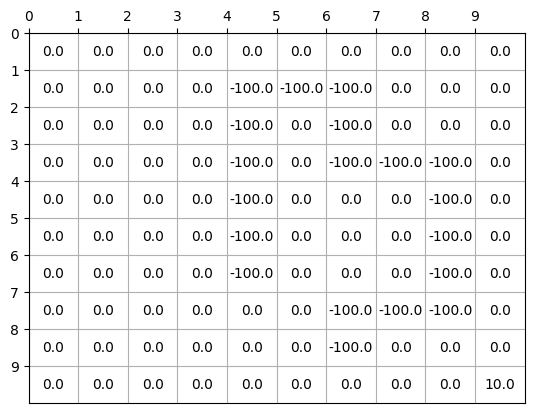

In [253]:
## Plotting the reward value for each state of the grid

def reward_grid_plot():
    reward_matrix = np.zeros((grid_size, grid_size))
    for j in range(grid_size):
        for i in range(grid_size):
            reward_matrix[i][j] = gw.reward(gw.point_to_int((i,j)))
    plot_matrix(reward_matrix)
    return reward_matrix
reward_matrix = reward_grid_plot()

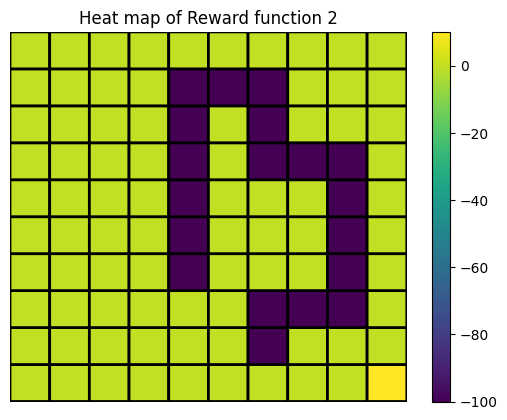

In [254]:
## For visualization generating the heat map of the ground truth reward

plt.pcolor(np.flipud(reward_matrix), edgecolors='k', linewidths=2,)
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 2')
plt.show()

In [255]:
def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



In [256]:
## STEP BY STEP

def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  #for i in range(21):
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



N_steps: 22


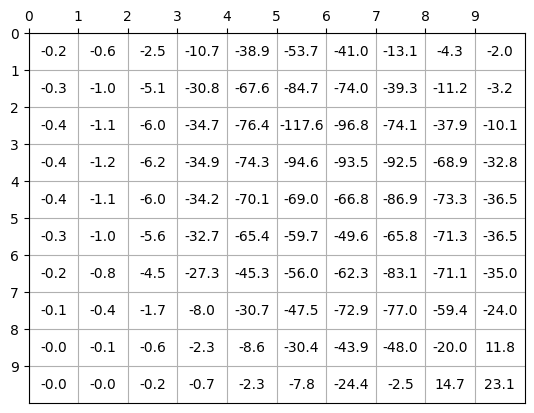

In [257]:
#### Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
    
# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = v[i]

plot_matrix(value_matrix)

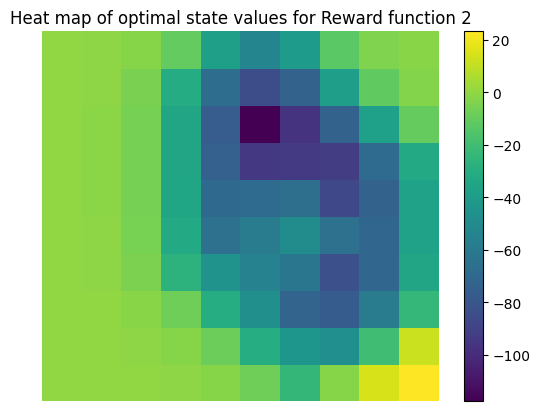

In [258]:
### For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 2')
plt.show()

In [259]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """

    if v is None:
        v = optimal_value(n_states, n_actions, transition_probabilities, reward,
                          discount, threshold)

    def _policy(s):
      return v[s]
     
    policy = np.array([_policy(s) for s in range(n_states)])
    return policy

In [260]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
  
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    delta = np.inf

    while delta>threshold:
      
      delta = 0

      for s in range(n_states):
        v = V[s]

        value_arr = np.zeros(n_actions)
        for a in range(n_actions):
          value = 0
          for s_next in range(n_states):
            value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
            
          value_arr[a] = value

        V[s] = np.max(value_arr) # maximum value of all the actions
        policy[s]=np.argmax(value_arr)
        delta = max(delta, abs(v-V[s]))

    return policy


In [261]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[i][j]
            arrow = ''
            if(c == 0):
                arrow = u'↓'
            elif(c == 1):
                arrow = u'→'
            elif(c == 2):
                arrow = u'↑'
            else:
                arrow = u'←'
            
            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()

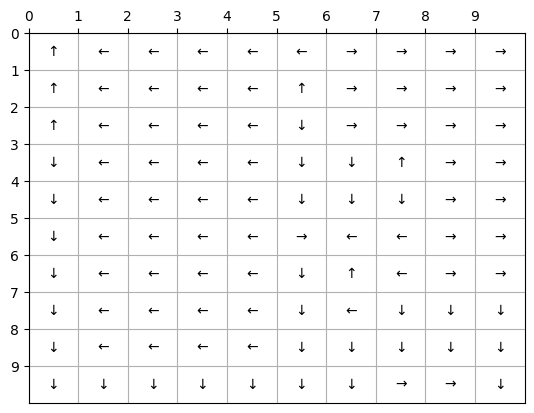

In [262]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)


## Reward Function 1 w=0.1

In [263]:
## Define the gridworld MDP class

class Gridworld(object):
    """
    Gridworld MDP.
    """
    
    def __init__(self, grid_size, wind, discount):
        """
        grid_size: Grid size. int.
        wind: Chance of moving randomly. float.
        discount: MDP discount. float.
        -> Gridworld
        """

        self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1)) #down, right, up, left
        self.n_actions = len(self.actions)
        self.n_states = grid_size**2
        self.grid_size = grid_size
        self.wind = wind
        self.discount = discount

        # Preconstruct the transition probability array.
        self.transition_probability = np.array(
            [[[self._transition_probability(i, j, k)
               for k in range(self.n_states)]
              for j in range(self.n_actions)]
             for i in range(self.n_states)])

    def __str__(self):
        return "Gridworld({}, {}, {})".format(self.grid_size, self.wind,
                                              self.discount)
    
    def int_to_point(self, i):
        """
        Convert a state int into the corresponding coordinate.

        i: State int.
        -> (x, y) int tuple.
        """

        return (i % self.grid_size, i // self.grid_size)
        
    def point_to_int(self, p):
        """
        Convert a coordinate into the corresponding state int.

        p: (x, y) tuple.
        -> State int.
        """

        return int(p[0] + p[1]*self.grid_size)

    def neighbouring(self, i, k):
        """
        Get whether two points neighbour each other. Also returns true if they
        are the same point.

        i: (x, y) int tuple.
        k: (x, y) int tuple.
        -> bool.
        """

        return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1

    def _transition_probability(self, i, j, k):
        """
        Get the probability of transitioning from state i to state k given
        action j.

        i: State int.
        j: Action int.
        k: State int.
        -> p(s_k | s_i, a_j)
        """

        xi, yi = self.int_to_point(i)
        xj, yj = self.actions[j]
        xk, yk = self.int_to_point(k)
        

        if not self.neighbouring((xi, yi), (xk, yk)):
            return 0

        # Is k the intended state to move to?
        if (xi + xj, yi + yj) == (xk, yk):
            return (1-self.wind+(self.wind/4))
           

        # If these are not the same point, then we can move there by wind.
        if (xi, yi) != (xk, yk):
            return self.wind/4
             

        
        # If these are the same point, we can only move here by either moving
        # off the grid or being blown off the grid. Are we on a corner or not?
        if (i==0 or i==9 or i==90 or i==99):
            # Corner.
            # Can move off the edge in two directions.
            # Did we intend to move off the grid?
            if (((xi,yi)==(0,0) and (xj==-1 or yj==-1)) or ((xi,yi)==(9,0) and (xj==1 or yj==-1)) or ((xi, yi)==(0,9) and (xj==-1 or yj==1)) or ((xi, yi)==(9,9) and (xj==1 or yj==1))): 
                # we have the regular success chance of staying here
                # plus an extra chance of blowing onto the *other* off-grid square
                
                return 1-self.wind+(self.wind/2)
            else:
                # We can blow off the grid in either direction only by wind.
                return self.wind/2
              
        else:

            # Not a corner. Is it an edge?
            if (xi==0 or xi==9 or yi==0 or yi==9): #edge 
              if(xi+xj>=0 and yi+yj>=0): # stay on grid
                  return self.wind/4
              elif (xi,yi)==(xk,yk): #move off the grid
                  return 1-self.wind+(self.wind/4)
            else:
              return 0

    def reward(self, state_int): #TODO: change to reward 2 for reward 2 (only here needed to change)
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """
    
        #postive_reward = 10
        #negative_reward = -100
        
        #look at figure 6,7 to retrurn a reward at the given state. 

        reward1 = np.zeros((10,10), dtype=int)
        reward1[2, 5]=-10
        reward1[2, 6]=-10
        reward1[3, 5]=-10
        reward1[3, 6]=-10

        reward1[4, 1]=-10
        reward1[4, 2]=-10
        reward1[5, 1]=-10
        reward1[5, 2]=-10

        reward1[8, 2]=-10
        reward1[8, 3]=-10
        reward1[9, 2]=-10
        reward1[9, 3]=-10

        reward1[9,9]=1
        
        xi, yi = self.int_to_point(state_int)
        return reward1[xi,yi]

In [264]:
## Function for plotting the matrix values

def plot_matrix(matrix):
    fig, ax = plt.subplots()
    num_rows = len(matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = matrix[i][j]
            ax.text(j + 0.5, i + 0.5, '{:.1f}'.format(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()
    plt.show()
    plt.close()

In [265]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.1
discount = 0.8

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount)

In [266]:
print(gw._transition_probability(1, 2, 1)) #i,j,k 
# j:
  # 0 = down, 1 = right, 2 = up, 3=left

0.025


In [267]:
print("inner")
print(gw._transition_probability(44, 2, 43)) #i,j,k 
print(gw._transition_probability(44, 2, 34))
print(gw._transition_probability(44, 2, 54))
print(gw._transition_probability(44, 2, 45))

print("corner 1")
print(gw._transition_probability(0, 2, 10))
print(gw._transition_probability(0, 2, 1))
print(gw._transition_probability(0, 2, 0))


print("corner 2")
print(gw._transition_probability(0, 1, 10))
print(gw._transition_probability(0, 1, 1))
print(gw._transition_probability(0, 1, 0))

print("edge 1")
print(gw._transition_probability(1, 3, 0))
print(gw._transition_probability(1, 3, 11))
print(gw._transition_probability(1, 3, 2))
print(gw._transition_probability(1, 3, 1))

print("edge 2")
print(gw._transition_probability(1, 2, 0))
print(gw._transition_probability(1, 2, 11))
print(gw._transition_probability(1, 2, 2))
print(gw._transition_probability(1, 2, 1))


inner
0.925
0.025
0.025
0.025
corner 1
0.025
0.025
0.9500000000000001
corner 2
0.925
0.025
0.05
edge 1
0.025
0.025
0.025
0.925
edge 2
0.925
0.025
0.025
0.025


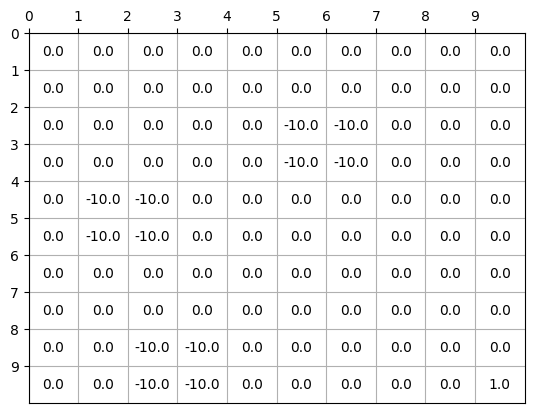

In [268]:
## Plotting the reward value for each state of the grid

def reward_grid_plot():
    reward_matrix = np.zeros((grid_size, grid_size))
    for j in range(grid_size):
        for i in range(grid_size):
            reward_matrix[i][j] = gw.reward(gw.point_to_int((i,j)))
    plot_matrix(reward_matrix)
    return reward_matrix
reward_matrix = reward_grid_plot()

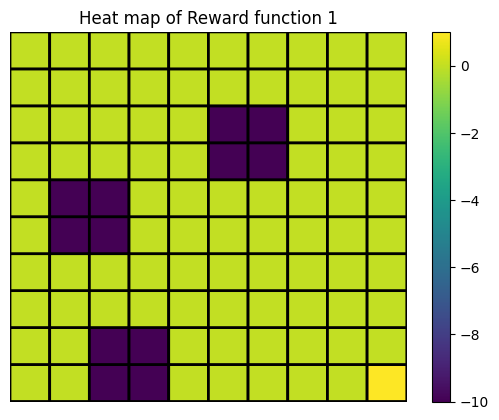

In [269]:
## For visualization generating the heat map of the ground truth reward

plt.pcolor(np.flipud(reward_matrix), edgecolors='k', linewidths=2,)
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 1')
plt.show()

In [270]:
def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



In [271]:
## STEP BY STEP

def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
  """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """
  
  # for all states, initialize each state value to 0 
  V = np.zeros(n_states)

  delta = np.inf
  N_steps = 0
  #for i in range(21):
  while delta>threshold:
    N_steps = N_steps + 1
    
    delta = 0

    for s in range(n_states):
      v = V[s]

      value_arr = np.zeros(n_actions)
      for a in range(n_actions):
        
        value = 0
        for s_next in range(n_states):
          value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
          
        value_arr[a] = value

      V[s] = np.max(value_arr) # maximum value of all the actions
      delta = max(delta, abs(v-V[s]))
  
  print("N_steps: " + str(N_steps))
  return V



N_steps: 21


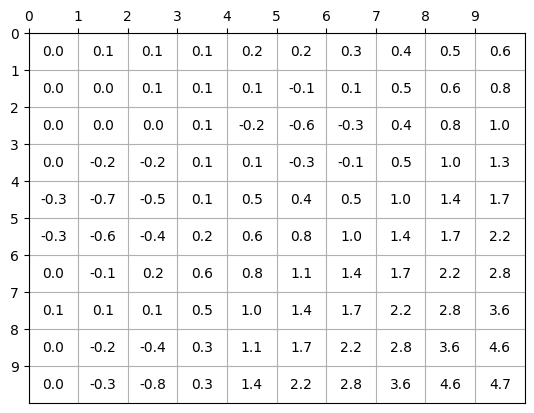

In [272]:
#### Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
    
# Computing the optimal value of each state

v = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = v[i]

plot_matrix(value_matrix)

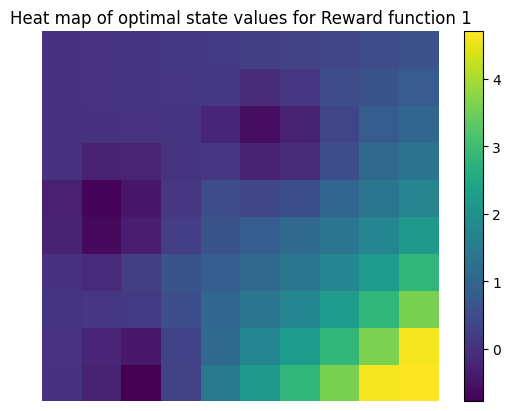

In [273]:
### For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

In [274]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """

    if v is None:
        v = optimal_value(n_states, n_actions, transition_probabilities, reward,
                          discount, threshold)

    def _policy(s):
      return v[s]
     
    policy = np.array([_policy(s) for s in range(n_states)])
    return policy

In [275]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
  
    """
    Find the optimal policy.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    v: Value function (if known). Default None.
    stochastic: Whether the policy should be stochastic. Default True.
    -> Action probabilities for each state or action int for each state
        (depending on stochasticity).
    """
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    delta = np.inf

    while delta>threshold:
      
      delta = 0

      for s in range(n_states):
        v = V[s]

        value_arr = np.zeros(n_actions)
        for a in range(n_actions):
          value = 0
          for s_next in range(n_states):
            value = value + transition_probabilities[s][a][s_next]*(reward[s_next]+discount*V[s_next])
            
          value_arr[a] = value

        V[s] = np.max(value_arr) # maximum value of all the actions
        policy[s]=np.argmax(value_arr)
        delta = max(delta, abs(v-V[s]))

    return policy


In [276]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[i][j]
            arrow = ''
            if(c == 0):
                arrow = u'↓'
            elif(c == 1):
                arrow = u'→'
            elif(c == 2):
                arrow = u'↑'
            else:
                arrow = u'←'
            
            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()

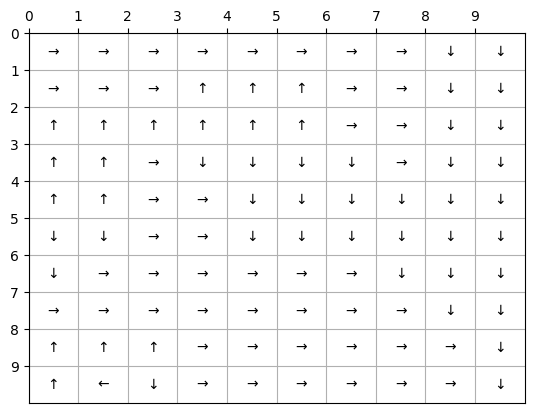

In [277]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)
